In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications.vgg16 import VGG16

import numpy as np
import matplotlib.pyplot as plt

from skimage import io
import cv2

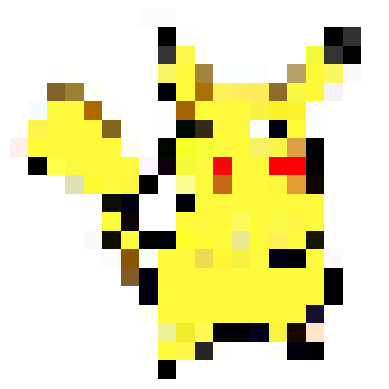

In [2]:
Pikachu = io.imread('http://pm1.narvii.com/6722/0ab8cce1e61ba0ef3beec0823b2c5321d1716fef_00.jpg')
Pikachu = cv2.resize(Pikachu[:,:,:3], (20,20))

plt.imshow( Pikachu )
plt.axis('off');

In [3]:
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=[240,240,3])

x = Flatten()(vgg16.output)
x = Dense(4, activation = 'sigmoid')(x)

model = Model(vgg16.input, x)

58889256/58889256 [==============================] - 1s 0us/step


In [4]:
def Image_Generator(batch_size = 64):

  while True:

    for _ in range(50):

      X = np.ones((batch_size, 240, 240, 3)) * 255
      Y = np.zeros((batch_size, 4))

      for i in range(batch_size):

        n_w = np.random.randint(10, 150)
        n_h = np.random.randint(10, 150)

        row_1 = np.random.randint(0, 240 - n_h)
        col_1 = np.random.randint(0, 240 - n_w)
        row_2 = row_1 + n_h
        col_2 = col_1 + n_w


        X[i, row_1:row_2, col_1:col_2, :] = cv2.resize(Pikachu, (n_w, n_h))
        Y[i,0] = row_1 / 240
        Y[i,1] = col_1 / 240
        Y[i,2] = (row_2 - row_1) / 240 
        Y[i,3] = (col_2 - col_1) / 240 
        
      yield X,Y

In [5]:
model.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 0.001))
model.fit(Image_Generator(), steps_per_epoch=50, epochs = 10)

Epoch 1/10
50/50 [==============================] - 93s 927ms/step - loss: 2.0191
Epoch 2/10
50/50 [==============================] - 46s 911ms/step - loss: 0.5884
Epoch 3/10
50/50 [==============================] - 46s 914ms/step - loss: 0.5757
Epoch 4/10
50/50 [==============================] - 46s 913ms/step - loss: 0.5596
Epoch 5/10
50/50 [==============================] - 46s 918ms/step - loss: 0.5545
Epoch 6/10
50/50 [==============================] - 46s 912ms/step - loss: 0.5488
Epoch 7/10
50/50 [==============================] - 46s 912ms/step - loss: 0.5472
Epoch 8/10
50/50 [==============================] - 46s 914ms/step - loss: 0.5452
Epoch 9/10
50/50 [==============================] - 46s 914ms/step - loss: 0.5484
Epoch 10/10
50/50 [==============================] - 46s 912ms/step - loss: 0.5445


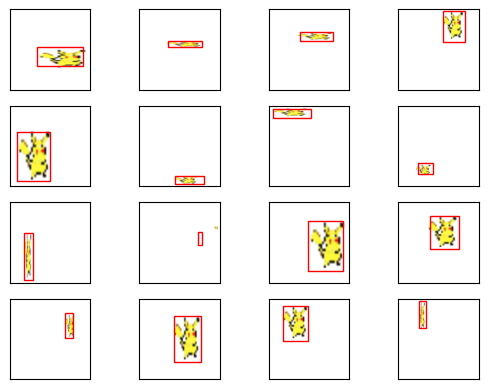

In [27]:
from matplotlib.patches import Rectangle
from itertools import product

fig, ax = plt.subplots(4,4)


for i,j in product(range(4), range(4)):
  n_w = np.random.randint(10, 150)
  n_h = np.random.randint(10, 150)

  x = np.ones((240, 240, 3)) * 255

  row_1 = np.random.randint(0, 240 - n_h)
  col_1 = np.random.randint(0, 240 - n_w)
  row_2 = row_1 + n_h
  col_2 = col_1 + n_w

  x[row_1:row_2, col_1:col_2, :] = cv2.resize(Pikachu, (n_w, n_h))

  x = np.expand_dims(x, axis = 0)
  p = model.predict(x, verbose = False)[0]

  ax[i][j].imshow(x[0].astype('uint8'))
  rect = Rectangle((p[1]*240, p[0]*240), p[3]*240, p[2]*240, linewidth = 1, edgecolor = 'r', facecolor = 'none')
  ax[i][j].add_patch(rect)
  ax[i][j].set_yticks([])
  ax[i][j].set_xticks([])

plt.show()